In [3]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']
print(d0.shape)
# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


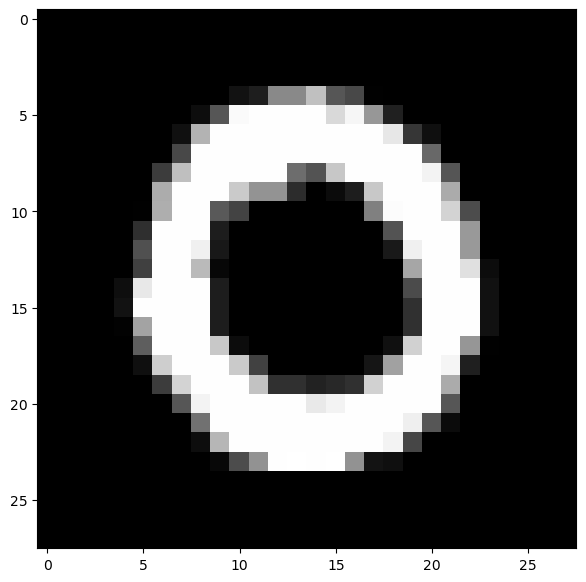

0


In [5]:
# Create a new figure with size 7x7 inches for plotting
plt.figure(figsize=(7,7))

# Choose the index of the image you want to display (here, the 1st image)
idx = 1  

# Extract the image data (flattened pixel values) from the DataFrame 'd' at row index 'idx'
# Convert that row to a NumPy array and reshape it from 1D (784,) to 2D (28x28)
# because MNIST images are 28x28 pixels
grid_data = d.iloc[idx].to_numpy().reshape(28,28)  

# Display the image on a 2D grid
# 'interpolation="none"' ensures no smoothing (pixels stay sharp)
# 'cmap="gray"' displays it in grayscale
plt.imshow(grid_data, interpolation="none", cmap="gray")

# Show the image on the output screen
plt.show()

# Print the corresponding label (digit) from the label list or Series 'l' at index 'idx'
print(l[idx])


#  2D Visualization using PCA 

In [6]:
# Pick first 15,000 data points to make the analysis faster
# (useful when working with large datasets like 42,000 images)
# 'head(15000)' returns the first 15,000 rows of the DataFrame or Series

labels = l.head(15000)   # Select the first 15,000 labels (target values)
data = d.head(15000)     # Select the first 15,000 image data entries (features)

# Print the shape (rows, columns) of the 'data' DataFrame
# This tells how many samples (rows) and features/pixels (columns) are included
print("the shape of sample data = ", data.shape)
print(d.shape)

the shape of sample data =  (15000, 784)
(42000, 784)


In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


In [11]:
# Assign the standardized data to a new variable 'sample_data'
# (just for clarity or convenience — both now refer to the same data)
sample_data = standardized_data

# Compute the covariance matrix manually using matrix multiplication
# Formula: Covariance matrix = Aᵀ × A
# where A = standardized data matrix
# Aᵀ (A transpose) changes rows to columns
# np.matmul() performs matrix multiplication between Aᵀ and A
covar_matrix = np.matmul(sample_data.T, sample_data)

# Print the shape of the covariance matrix
# If 'sample_data' has shape (n_samples, n_features),
# then 'covar_matrix' will have shape (n_features, n_features)
# Example: (15000, 784) → covariance matrix shape = (784, 784)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [13]:
# Find top 2 eigenvalues and eigenvectors for 2D projection
from scipy.linalg import eigh

# eigh() gives eigenvalues in ascending order
# 'subset_by_index' picks the last 2 (largest) eigenvalues
values, vectors = eigh(covar_matrix, subset_by_index=[covar_matrix.shape[0]-2, covar_matrix.shape[0]-1])
# Print eigenvalues
print("Top 2 eigenvalues:", values)
print("Top 2 eigenvectors:", vectors)
print("Shape of eigen vectors =", vectors.shape)
print(vectors.shape)
# Transpose for easier use later
vectors = vectors.T
print("Top 2 eigenvectors:", vectors)
print("Updated shape of eigen vectors =", vectors.shape)

# vectors[0] → 1st principal component
# vectors[1] → 2nd principal component


Top 2 eigenvalues: [435532.55785282 605719.29173629]
Top 2 eigenvectors: [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Shape of eigen vectors = (784, 2)
(784, 2)
Top 2 eigenvectors: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Updated shape of eigen vectors = (2, 784)


In [19]:
# Project the data onto the 2D plane formed by the top 2 principal components

import matplotlib.pyplot as plt

# Multiply eigenvectors (2 x features) with the transposed data (features x samples)
# This gives the coordinates of each sample in the new 2D PCA space
new_coordinates = np.matmul(vectors, sample_data.T)

# Print the shapes to verify matrix multiplication
# vectors.shape = (2, number_of_features)
# sample_data.T.shape = (number_of_features, number_of_samples)
# new_coordinates.shape = (2, number_of_samples)
print("Resultant new data points' shape:", vectors.shape, "X", sample_data.T.shape, "=", new_coordinates.shape)
print("Resultant new data points' shape:", vectors.shape, "X", sample_data.T.shape, "=", new_coordinates.T.shape)
new=new_coordinates.T
data_frame = pd.DataFrame(data=new, columns=("1st_principal", "2nd_principal"))
print(data_frame.head())

Resultant new data points' shape: (2, 784) X (784, 15000) = (2, 15000)
Resultant new data points' shape: (2, 784) X (784, 15000) = (15000, 2)
   1st_principal  2nd_principal
0      -5.558661      -5.043558
1       6.193635      19.305278
2      -1.909878      -7.678775
3       5.525748      -0.464845
4       6.366527      26.644289


In [20]:
import pandas as pd

# Append the labels (y-values) to the projected 2D data
# new_coordinates has shape (2, number_of_samples)
# labels has shape (number_of_samples,)
# np.vstack() stacks them vertically → shape becomes (3, number_of_samples)
# Then we take transpose (.T) → shape becomes (number_of_samples, 3)
# so each row = [1st_principal, 2nd_principal, label]
new_coordinates = np.vstack((new_coordinates, labels)).T

# Create a DataFrame from the new array for easier plotting and analysis
# Columns represent two principal components and the label
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

# Display the first 5 rows to verify
print(dataframe.head())


   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


In [22]:
import pandas as pd  # Import the pandas library for handling data tables

# Create an empty DataFrame
df = pd.DataFrame()

# Add a column named '1st' with numerical values (for example, 1st principal component)
df['1st'] = [-5.558661, -5.043558, 6.193635, 19.305278]

# Add another column named '2nd' (for example, 2nd principal component)
df['2nd'] = [-1.558661, -2.043558, 2.193635, 9.305278]

# Add a 'label' column — could represent different classes or categories
df['label'] = [1, 2, 3, 4]
df.head()

,1st,2nd,label
0,-5.558661,-1.558661,1
1,-5.043558,-2.043558,2
2,6.193635,2.193635,3
3,19.305278,9.305278,4


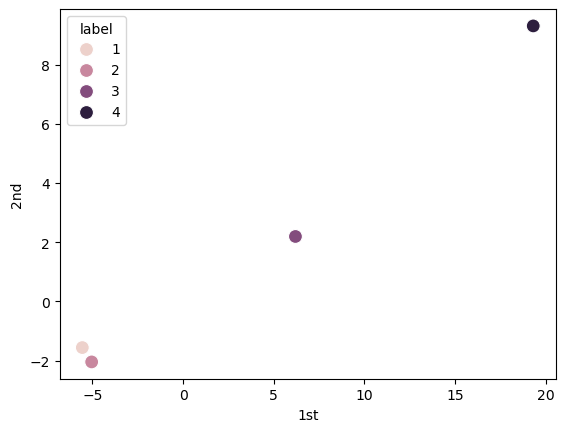

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple 2D scatter plot with color based on labels
sns.scatterplot(data=df, x='1st', y='2nd', hue='label', s=100)

plt.show()


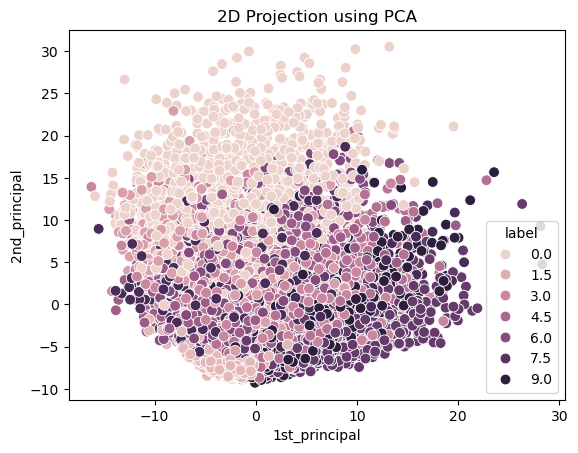

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple 2D scatter plot of PCA results
sns.scatterplot(data=dataframe, x='1st_principal', y='2nd_principal', hue='label', s=60)

plt.title("2D Projection using PCA")
plt.show()


# PCA using Scikit-Learn

o yes — sklearn PCA automatically does:

Covariance matrix calculation

Eigenvalues calculation

Eigenvectors calculation

Sorting principal components

Data projection to new space

You only tell how many components you want (e.g., 2), and it handles the math.

In [21]:
# Import PCA (Principal Component Analysis) from sklearn's decomposition module
from sklearn import decomposition

# Create a PCA object (no parameters yet — it will keep all components by default)
pca = decomposition.PCA()


In [30]:
# Set PCA parameters
# We want to reduce the data to 2 dimensions (for 2D visualization)
pca.n_components = 2
print("shape of pca_ = ", sample_data.shape)

# Fit PCA on the standardized data and transform it
# This finds the top 2 principal components and projects the data onto them
pca_data = pca.fit_transform(sample_data)

# Print the shape of the new reduced data
# If original data had shape (15000, 784),
# the reduced data will have shape (15000, 2)
print("shape of pca_reduced = ", pca_data.shape)


shape of pca_ =  (15000, 784)
shape of pca_reduced =  (15000, 2)


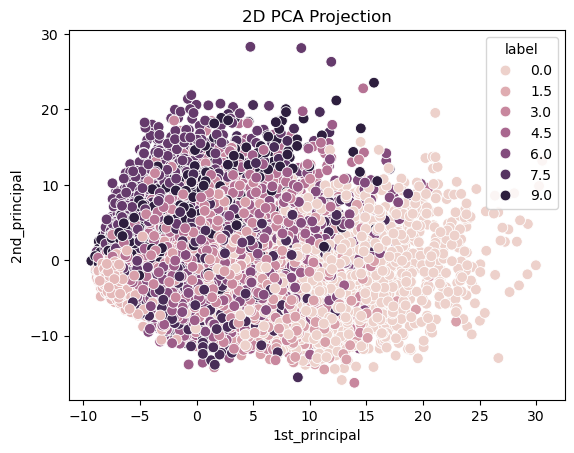

In [31]:
# Attach labels to each 2D data point
# pca_data.T → transpose to make shape (2, samples)
# np.vstack() → stack the 2D data and labels together vertically
# .T → transpose back to get shape (samples, 3)
pca_data1 = np.vstack((pca_data.T, labels)).T

# Create a DataFrame with 3 columns: two principal components + label
pca_df = pd.DataFrame(data=pca_data1, columns=("1st_principal", "2nd_principal", "label"))

# Import required libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Create a simple scatter plot of the 2D PCA data
# data=pca_df → use our new DataFrame
# x, y → principal components for axes
# hue='label' → color points by their label (class)
# s=60 → size of each point
sns.scatterplot(data=pca_df, x='1st_principal', y='2nd_principal', hue='label', s=60)

# Add a title to the plot
plt.title("2D PCA Projection")

# Show the plot on screen
plt.show()


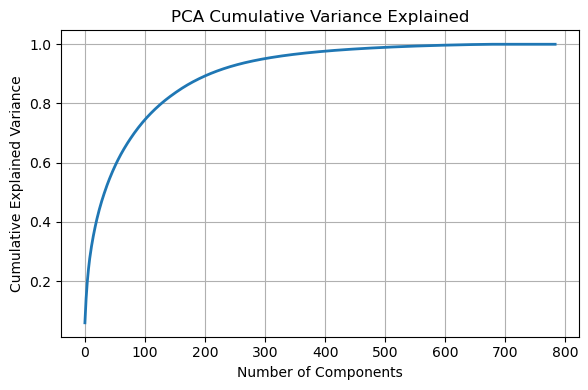

In [25]:
# 📊 PCA for Dimensionality Reduction (Non-Visualization)

from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA and set number of components to total features (784 for MNIST-like data)
pca = decomposition.PCA(n_components=784)

# Fit PCA on the sample data
pca_data = pca.fit_transform(sample_data)

# Calculate percentage of variance explained by each principal component
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

# Compute cumulative variance explaineds
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the cumulative explained variance curve
plt.figure(figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Variance Explained')
plt.tight_layout()
plt.show()

# 🧠 Insight:
# Taking around 200 components explains ~90% of the total variance.
